In [1]:
# Imports principais
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# comando que faz com que os gráficos gerados usando Matplotlib sejam exibidos diretamente dentro do próprio notebook
%matplotlib inline

# Criação de um circuito quântico inicial

## Representação do circuito e do vetor de estado

Neste trecho, criamos a estrutura básica de um circuito quântico usando o **Qiskit**.  Primeiro, importamos as classes `QuantumRegister` e `QuantumCircuit`, que são fundamentais para construir e manipular circuitos quânticos. O **registrador quântico** (`QuantumRegister`) define um conjunto de qubits. Aqui, criamos um registrador com 2 qubits, nomeado como `'q'`.  Cada qubit é inicialmente preparado no estado base $|0⟩$, e o estado do sistema no início é:
$$
|00⟩ = |0⟩ \otimes |0⟩
$$

Em seguida, criamos um **circuito quântico** (`QuantumCircuit`) que utiliza esse registrador. O circuito é o ambiente onde aplicaremos portas quânticas para manipular o estado dos qubits — por exemplo, Hadamard, Pauli-X, ou CNOT. Por fim, o comando `qc.qubits` apenas lista os qubits existentes no circuito, retornando referências internas a eles. Esses objetos podem ser usados posteriormente para aplicar operações individuais ou entre qubits específicos.

O código realiza três operações principais. Primeiro, `qc.draw("mpl")` plota o circuito quântico utilizando o **Matplotlib** como backend, gerando uma representação visual dos qubits e das portas aplicadas. Como o circuito ainda não contém operações, o diagrama mostra apenas dois fios correspondentes aos qubits no estado inicial $|0⟩$. Em seguida, `psi = Statevector.from_instruction(qc)` calcula o **vetor de estado** associado ao circuito. A classe `Statevector`, do módulo `qiskit.quantum_info`, traduz as instruções do circuito em um vetor complexo normalizado que representa o estado quântico do sistema.  Como nenhum operador foi aplicado, o estado permanece:
$$
|\psi\rangle = |00\rangle = 
\begin{bmatrix}
1 \\ 0 \\ 0 \\ 0
\end{bmatrix}
$$
Esse vetor pertence ao espaço de Hilbert de dimensão $2^n$, onde $n$ é o número de qubits (neste caso, $n=2$).Por fim, `psi.draw('latex')` exibe o vetor de estado na notação de **Dirac**, formatada em LaTeX, o que permite visualizar o estado de forma simbólica, por exemplo:
$$
|\psi\rangle = |00\rangle
$$
Essa notação é amplamente usada em mecânica quântica para representar estados vetoriais de forma compacta e elegante.



In [2]:
# Cria um registrador quântico com 2 qubits
qReg = QuantumRegister(2, 'q')

# Cria um circuito quântico associado ao registrador
qc = QuantumCircuit(qReg)

# Exibe os qubits do circuito
qc.qubits

# Plota o circuito quântico usando a interface gráfica do Matplotlib
qc.draw("mpl")

# Extrai o vetor de estado correspondente ao circuito atual
psi = Statevector.from_instruction(qc).reverse_qargs()

# Mostra o vetor de estado em notação Dirac
psi.draw('latex')

<IPython.core.display.Latex object>

## Visualizaçao na esfera de bloch

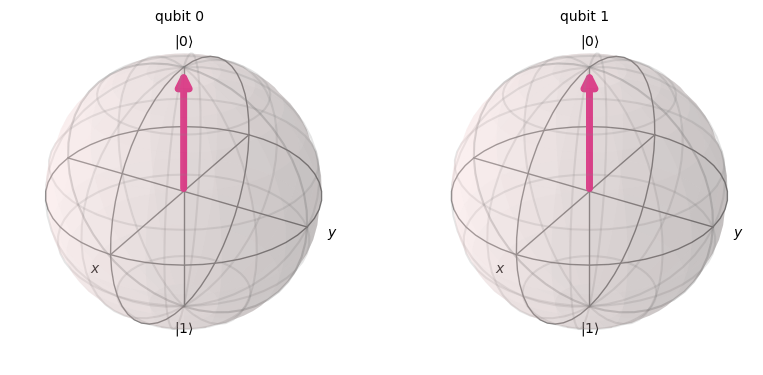

In [3]:
# plta esfrea de Bloch do estado do circuito
display(plot_bloch_multivector(psi))

# Aplicação da porta X e evolução do estado quântico

A **porta X**, também chamada de **NOT quântica**, é o análogo direto da operação lógica de negação na computação clássica. Ela inverte o estado de um qubit, transformando $|0⟩$ em $|1⟩$ e vice-versa. Matematicamente, essa porta é representada pela **matriz de Pauli-X**:

$$
X =
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}
$$

Quando aplicada ao primeiro qubit de um sistema inicialmente no estado $|00⟩$, a operação produz o estado:

$$
|\psi\rangle = X |00\rangle = |01\rangle
$$

O novo vetor de estado no espaço de Hilbert de dimensão $2^2 = 4$ é:

$$
|\psi\rangle =
\begin{bmatrix}
0 \\ 1 \\ 0 \\ 0
\end{bmatrix}
$$

Isso significa que apenas a terceira componente do vetor (associada à base $|10⟩$) possui amplitude igual a 1, enquanto as demais são nulas. Por fim, a função `psi.draw('latex')` exibe o vetor de estado em **notação de Dirac**, apresentando o resultado de forma simbólica e elegante:

$$
|\psi\rangle = |01\rangle
$$

Essa representação é fundamental na mecânica quântica, pois evidencia a correspondência entre o vetor numérico no espaço de Hilbert e o estado físico do sistema.


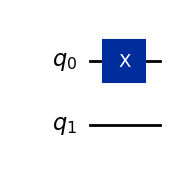

<IPython.core.display.Latex object>

In [5]:
# Cria um registrador quântico com 2 qubits
qReg = QuantumRegister(2, 'q')

# Cria um circuito quântico associado ao registrador
qc = QuantumCircuit(qReg)

# Aplica a porta X (NOT quântica) no qubit 0, invertendo seu estado de |0⟩ para |1⟩
qc.x(0)

# Exibe graficamente o circuito com a porta aplicada
display(qc.draw('mpl'))

# Calcula o vetor de estado resultante do circuito atualizado
psi = Statevector.from_instruction(qc)#.reverse_qargs()

# Mostra o vetor de estado em notação Dirac
psi.draw('latex')

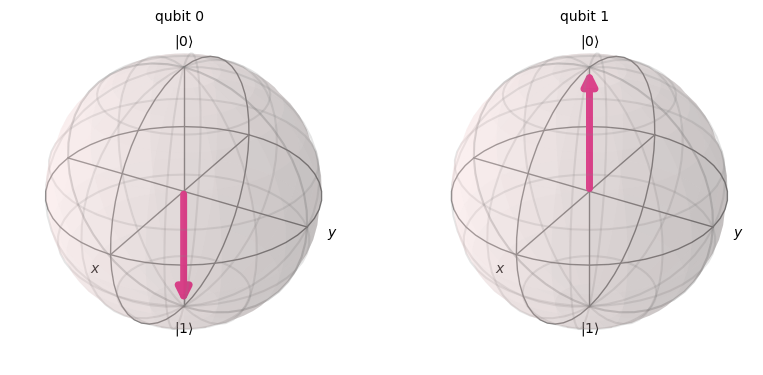

In [6]:
display(plot_bloch_multivector(qc))

## Aplicação da porta Hadamard no qubit 0 e formação de superposição com fase negativa

Após a aplicação da porta **X** no qubit 0, o sistema de dois qubits encontrava-se no estado $|01⟩$, pois o Qiskit utiliza a convenção **little-endian** (o qubit 0 é o menos significativo e aparece à direita no ket). Em seguida, aplicamos a **porta Hadamard (H)** ao qubit 0. Essa porta é uma das transformações mais importantes da computação quântica, responsável por criar **superposições coerentes** dos estados base. Sua representação matricial é:

$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

A ação da porta Hadamard sobre os estados base é:

$$
H|0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}, \quad
H|1\rangle = \frac{|0\rangle - |1\rangle}{\sqrt{2}}.
$$

Como o qubit 0 estava no estado \(|1⟩\), temos:

$$
H_0 |01\rangle = |0\rangle \otimes H|1\rangle = \frac{|00\rangle - |01\rangle}{\sqrt{2}}.
$$

Portanto, o novo **estado quântico do sistema** é:

$$
|\psi\rangle = \frac{\sqrt{2}}{2}|00\rangle - \frac{\sqrt{2}}{2}|01\rangle,
$$

ou, de forma vetorial:

$$
|\psi\rangle =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\ -1 \\ 0 \\ 0
\end{bmatrix}.
$$

Esse resultado mostra que o qubit 0 encontra-se agora em uma **superposição com fase relativa negativa**, enquanto o qubit 1 permanece em \(|0⟩\). O circuito, visualizado por `display(qc.draw('mpl'))`, apresenta a porta Hadamard aplicada ao primeiro fio (qubit 0), e o vetor de estado exibido confirma essa combinação coerente entre \(|00⟩\) e \(|01⟩\).

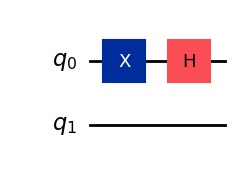

<IPython.core.display.Latex object>

In [7]:
# Aplica a porta Hadamard (H) ao qubit 0
# A porta H transforma o estado base |0⟩ em uma superposição (|0⟩ + |1⟩)/√2
qc.h(0)

# Exibe graficamente o circuito com a porta Hadamard aplicada
display(qc.draw('mpl'))

# Calcula o vetor de estado resultante do circuito atualizado
# A partir das instruções atuais, o Qiskit obtém o vetor de estado correspondente
psi = Statevector.from_instruction(qc)

# Mostra o vetor de estado em notação Dirac
psi.draw('latex')

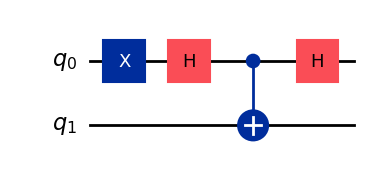

<IPython.core.display.Latex object>

In [8]:
# Aplica uma porta CNOT com controle em q0 e alvo em q1
qc.cx(0, 1)

# Aplica a porta Hadamard (H) ao qubit 0, criando uma superposição de estados
qc.h(0)

# Exibe o circuito quântico atualizado com a porta Hadamard aplicada
display(qc.draw('mpl'))

# Calcula o vetor de estado resultante após a aplicação da porta H
psi = Statevector.from_instruction(qc)

# Mostra o vetor de estado em notação Dirac
psi.draw('latex')

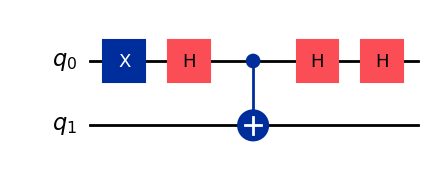

Statevector([ 7.07106781e-01+0.j,  2.29934717e-17+0.j, -2.29934717e-17+0.j,
             -7.07106781e-01+0.j],
            dims=(2, 2))


In [9]:
# Aplicando a porta H no qubit 0
qc.h(0)
display(qc.draw('mpl'))
psi = Statevector.from_instruction(qc)
print(psi)

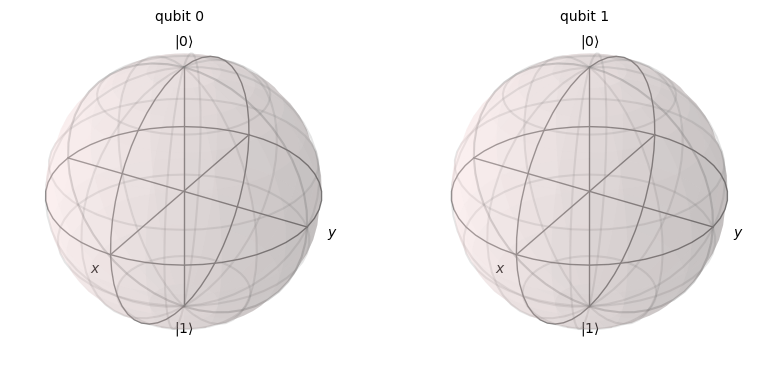

In [10]:
# plta esfrea de Bloch do estado do circuito
display(plot_bloch_multivector(psi))

### Terceira porta: CNOT
A porta Controlled-NOT (CNOT) é uma porta dois qubits que inverte o estado do qubit de destino (neste caso $q_1$) se, e somente se, o qubit de controle  (neste caso $q_0$) estiver no estado $|1\rangle$. Se o qubit de controle estiver no estado $|0\rangle$, o qubit de destino permanece inalterado. Ela corresponde a uma porta XOR clássica e é fundamental para criar emaranhamento quântico.

A combinação da porta CNOT com portas Hadamard é a forma básica de criar estados emaranhados a partir da base computacional. 

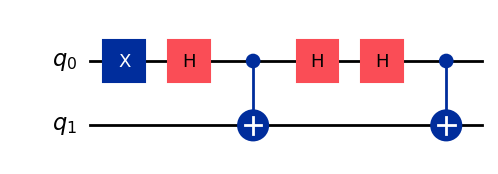

Statevector([ 7.07106781e-01+0.j, -7.07106781e-01+0.j, -2.29934717e-17+0.j,
              2.29934717e-17+0.j],
            dims=(2, 2))


In [11]:
qc.cx(0,1)
display(qc.draw('mpl'))
psi = Statevector.from_instruction(qc)
print(psi)

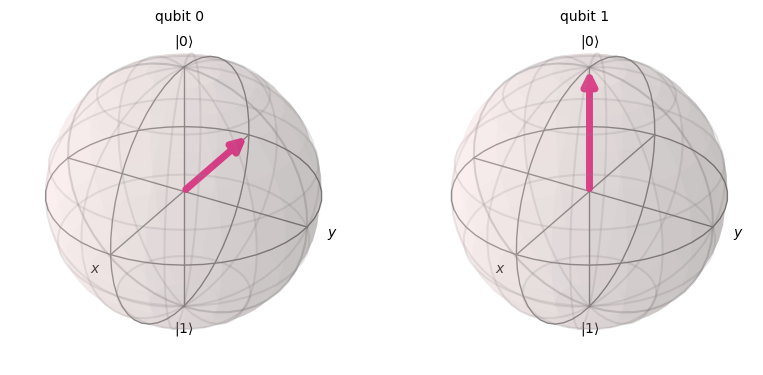

In [12]:
display(plot_bloch_multivector(qc))

### Quarta porta: Hadamard em $q_0$ e $R_y(\pi)$ em $q_1$
Em um circuito quântico, a porta $R_y$ é um operador que rotaciona o estado de um qubit em torno do eixo Y da esfera de Bloch por um determinado ângulo $\theta$. Ela altera o estado de superposição do qubit, misturando os estados $|0\rangle$ e $|1\rangle$, criando uma nova combinação desses dois estados.

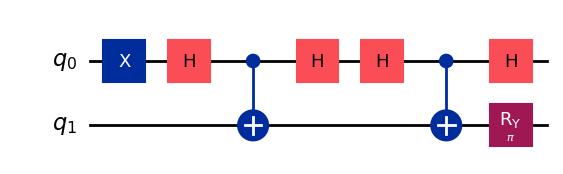

Statevector([6.35898720e-34+0.j, 9.37500195e-17+0.j, 6.22328532e-19+0.j,
             1.00000000e+00+0.j],
            dims=(2, 2))


In [13]:
qc.h(0)
qc.ry(np.pi, 1)
display(qc.draw('mpl'))
psi = Statevector.from_instruction(qc)
print(psi)

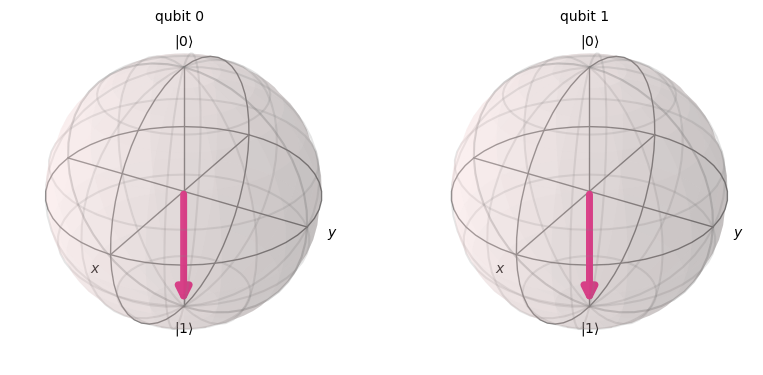

In [14]:
display(plot_bloch_multivector(qc))